# Libraries

In [1]:
from __future__ import division, print_function

import os
import numpy as np
from numpy.polynomial.polynomial import polyval
import scipy.io as sio
import matplotlib.pyplot as plt
import math
from math import pi

from lib import *

from IPython.display import clear_output
%matplotlib inline

# Find roots

In [2]:
# Parameters
param = {'g': 1.5,
        'omega0': 1.0,
        'a' : 1.0,
        'T' : 0.05,
        'gain': 30
        }

# Approximation parameters
N_x = 40
N_tau = N_x**2
b = [1.53534221e+00, 1.18686258e-03]
phi_fun = lambda X: polyval(X, b)
sigma2 = 0.001
sigma = np.sqrt(sigma2)

# Model parameters
w0 = param['omega0']
g = param['g']
a = param['a']
T = param['T']

# Root finding methods
fun = lambda u: w0 + g*a*funlib.R_sum(u, N_tau, N_x, param, phi_fun) - u
Omega1 = rootlib.find_root(fun, w0, w0-g, w0+g, steps=20)

# Analytic solution without gain
fun2 = lambda u: w0 + g*a*(np.cos(2*T*u)-1)/(2*T*u) - u
Omega2 = rootlib.find_root(fun2, w0, w0-g, w0+g, steps=20)

# Approximate solution using Gaussian distribution
fun3 = lambda u: w0 + g*a*funlib.R_sum_gauss(u, N_tau, N_x, param, sigma) - u
Omega3 = rootlib.find_root(fun3, w0, w0-g, w0+g, steps=20)

In [3]:
Omega1, Omega3

(0.9296380527096182, 0.6480909008835288)

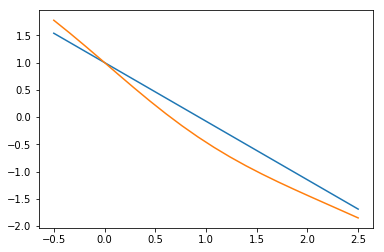

In [4]:
fig, ax = plt.subplots(1,1)

x_arr = np.linspace(w0-g, w0+g, num=20)
y_arr = np.array([fun(x) for x in x_arr])
y_arr3 = np.array([fun3(x) for x in x_arr])
ax.plot(x_arr, y_arr)
ax.plot(x_arr, y_arr3)